Trained with raw data and Gaussian Noise. The model Hyperparameters are not tuned.

Import all Needed Libraries and Modules.

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk
import keras
import tensorflow  as tf

import itertools
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, MaxPooling1D, Flatten, Dense, Dropout


Load the Dataset

In [2]:
try:
    for dirname, _, filenames in os.walk('ECG/inputs/'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
except Exception as e:
    print(f"An error occurred: {e}")

ECG/inputs/dataECG\mitbih_test.csv
ECG/inputs/dataECG\mitbih_train.csv
ECG/inputs/dataECG\ptbdb_abnormal.csv
ECG/inputs/dataECG\ptbdb_normal.csv


In [3]:
train_data = pd.read_csv('ECG/inputs/dataECG/mitbih_train.csv', header=None)
test_data = pd.read_csv('ECG/inputs/dataECG/mitbih_test.csv',header=None)


#split target and value
train_target = train_data[187]
test_target  = test_data [187]
train = train_data.drop(187,axis=1)
test = test_data.drop(187,axis=1)

In [4]:
train_data.shape

(87554, 188)

In [5]:
train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_data.shape

(21892, 188)

Let's Explore the Dataset to see how it looks like.

In [7]:
expl_mitbih_train = train_target.copy()

In [8]:
expl_mitbih_test = test_target.copy()

In [9]:
expl_mitbih_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [10]:
expl_train = expl_mitbih_train.astype(int)

explor_train = expl_train.value_counts()

In [11]:
explor_train

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

Let's see the data representation using Pie chart.

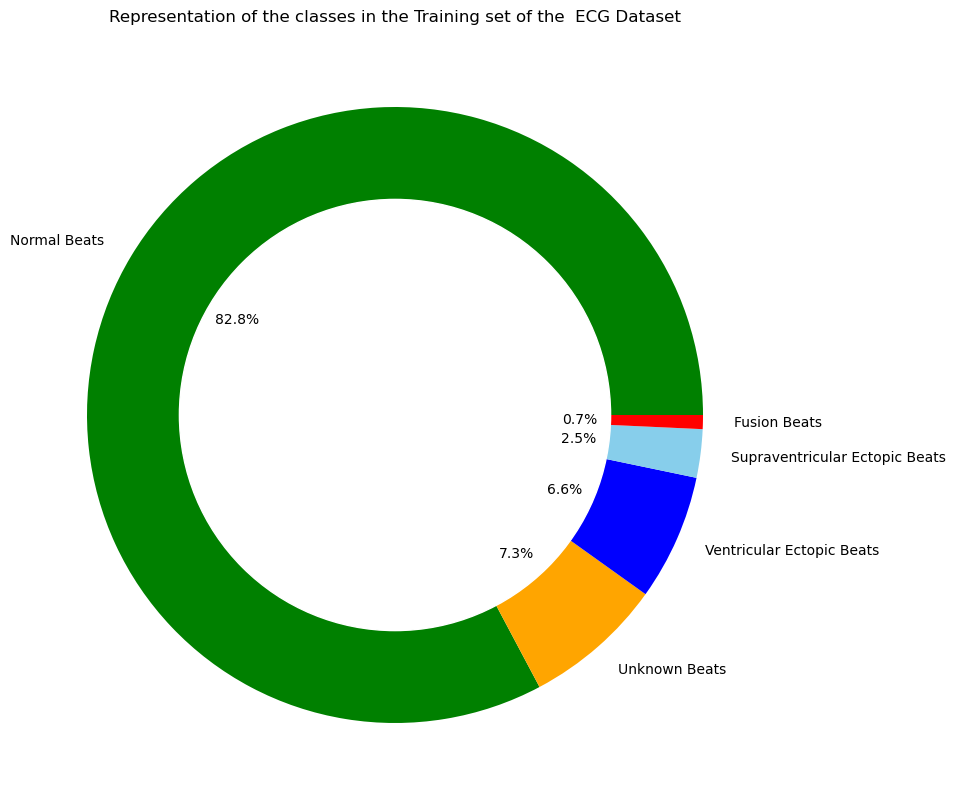

In [12]:
plt.figure(figsize = (10, 10))
circle = plt.Circle((0, 0), 0.7, color = "white")
plt.pie(explor_train, labels = ["Normal Beats", "Unknown Beats", "Ventricular Ectopic Beats", "Supraventricular Ectopic Beats", "Fusion Beats"], colors = ["green", "orange", "blue", "skyblue", "red"], autopct = "%1.1f%%")
k = plt.gcf()
k.gca().add_artist(circle)
plt.title("Representation of the classes in the Training set of the  ECG Dataset")
plt.show()

Let's take a look at what each heart beat represented in the data look like.

In [13]:
classes = train_data.groupby(187, group_keys = False).apply(lambda train_data : train_data.sample(1))

In [14]:
classes

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
68395,0.843011,0.853763,0.346237,0.000000,0.040860,0.077419,0.070968,0.077419,0.073118,0.058065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73677,0.950382,0.782443,0.171756,0.000000,0.068702,0.118321,0.122137,0.156489,0.202290,0.179389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79061,0.015038,0.090226,0.154135,0.270677,0.458647,0.518797,0.379699,0.289474,0.240602,0.244361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
81096,0.993798,0.730233,0.410853,0.124031,0.046512,0.088372,0.058915,0.027907,0.029457,0.020155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
85306,0.630724,0.548006,0.471196,0.382570,0.283604,0.161004,0.085672,0.023634,0.004431,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


Text(0.5, 1.0, 'Normal Heart Beat')

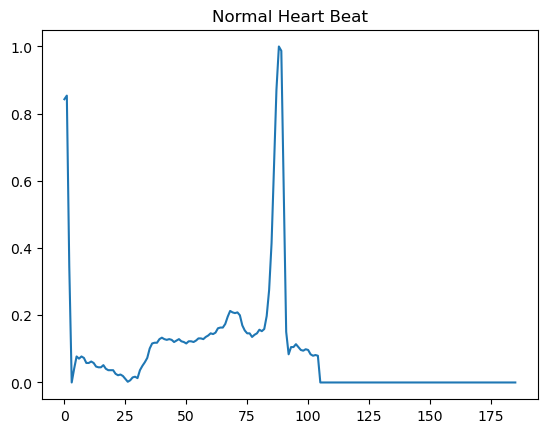

In [15]:
plt.plot(classes.iloc[0, : 186])
plt.title("Normal Heart Beat")

Text(0.5, 1.0, 'Supraventricular Ectopic Beat')

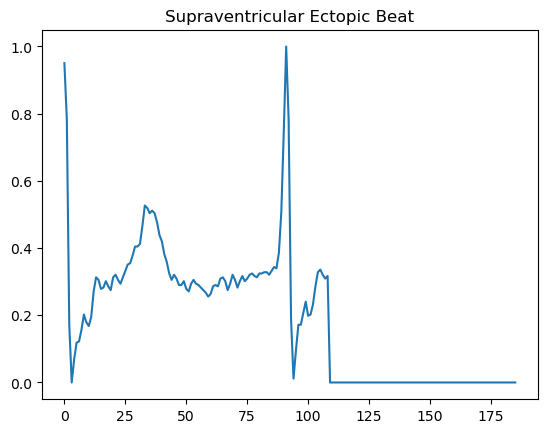

In [16]:
plt.plot(classes.iloc[1, : 186])
plt.title("Supraventricular Ectopic Beat")

Text(0.5, 1.0, 'Ventricular Ectopic Beat')

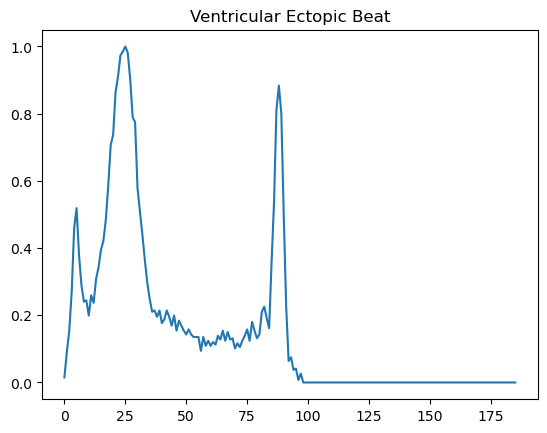

In [17]:
plt.plot(classes.iloc[2, : 186])
plt.title("Ventricular Ectopic Beat")

Text(0.5, 1.0, 'Fusion Beat')

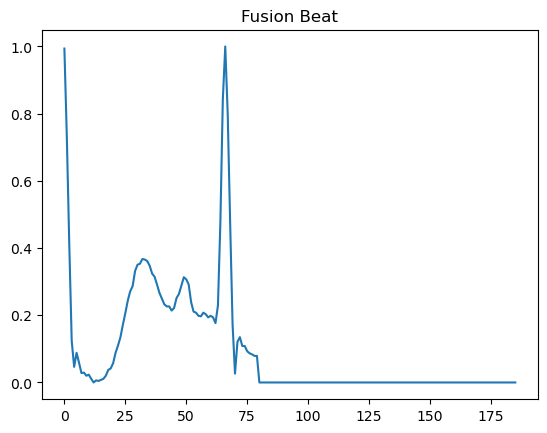

In [18]:
plt.plot(classes.iloc[3, : 186])
plt.title("Fusion Beat")

Text(0.5, 1.0, 'Unknown Beat')

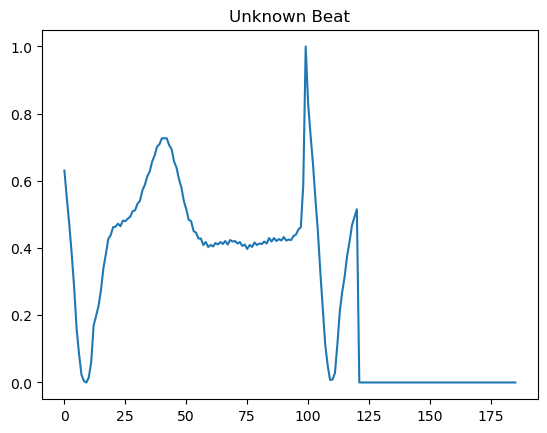

In [19]:
plt.plot(classes.iloc[4, : 186])
plt.title("Unknown Beat")

I will add a little Guassian Noise to the images just to help the model learn very well without over fitting.

* Generate the Gaussian noise.

In [20]:
np.random.seed (100)

def add_noise(signal):
    gaussian_noise = np.random.normal(0.2, 0.5, 186)
    noissy_signal = signal + gaussian_noise
    return noissy_signal

In [21]:
example = classes.iloc[0, : 186]

noissy_sample = add_noise(example)

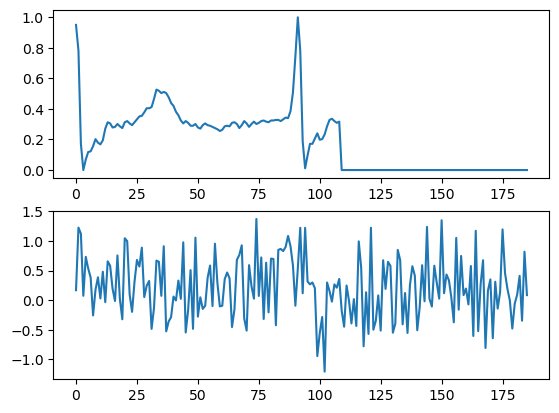

In [22]:
plt.subplot(2, 1, 1)
plt.plot(classes.iloc[1, : 186])

plt.subplot(2, 1, 2)
plt.plot(noissy_sample)

plt.show()

Data Preparation.

In [23]:
y_train = to_categorical(expl_mitbih_train)

y_test = to_categorical(expl_mitbih_test)

In [24]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
y_train.shape

(87554, 5)

In [26]:
x_train = train_data.iloc[ : ,  : 186].values
x_test = test_data.iloc[ : ,  : 186].values

In [27]:
x_train.shape

(87554, 186)

* Add the Gaussian noise to the training set.

In [28]:
for k in range(len(x_train)):
    x_train[k, : 186] = add_noise(x_train[k, : 186])
x_train = x_train.reshape(len(x_train), x_train.shape[1], 1)

x_test = x_test.reshape(len(x_test), x_test.shape[1], 1)


Reshape the dataset.

In [29]:
x_train.shape

(87554, 186, 1)

`An adaptation of residual connection inspired fron ResNet with basic CNN.`

In [30]:
def residual_block(x, filters, kernel_size = 3, strides = 1):
    # Shortcut connection
    shortcut = x
    
    # First convolution layer
    x = Conv1D(filters, kernel_size = kernel_size, strides = strides, padding = "same", kernel_initializer = GlorotUniform())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second convolution layer
    x = Conv1D(filters, kernel_size = kernel_size, strides = strides, padding = "same", kernel_initializer = GlorotUniform())(x)
    x = BatchNormalization()(x)
    
    # Adjusting the shortcut connection with a 1x1 convolution
    shortcut = Conv1D(filters, kernel_size = 1, strides = strides, padding = "same")(shortcut)
    
    # Adding the shortcut to the main path
    x = Add()([x, shortcut])
    x = Activation("selu")(x)
    
    return x

In [31]:
input_shape = (x_train.shape)
class_num = len(classes)

In [32]:
class_num

5

In [33]:
input_shape

(87554, 186, 1)

In [34]:
input = (x_train.shape[1], 1)

input_shape = tf.keras.Input(shape = input)

In [35]:
def build_model (input_shape, class_num):
    input_shape = input_shape
    #cnn_input = tf.keras.Input(shape = (input), name = "cnn_input")

    x = Conv1D(64, kernel_size = 5, strides = 2, padding = "same", kernel_initializer = GlorotUniform())(input_shape)
    x = BatchNormalization()(x)
    x = Activation("selu")(x)


    x = MaxPooling1D(pool_size = (3))(x)

    # Add the Residual Layer.
    x = residual_block(x, filters = 64)
    x = residual_block(x, filters = 64)
    x = residual_block(x, filters = 64)
    x = BatchNormalization()(x)

    x = MaxPooling1D(pool_size = (2))(x)

    x = Dropout(0.25)(x)

    x = residual_block(x, filters = 128)
    x = residual_block(x, filters = 128)
    x = BatchNormalization()(x)

    x = MaxPooling1D(pool_size = (2))(x)

    x = residual_block(x, filters = 256)

    x = MaxPooling1D(pool_size = (2))(x)

    flatten = Flatten()(x)

    x = Dense(128, activation = "selu", kernel_initializer = GlorotUniform())(flatten)
    x = Dropout(0.25)(x)
    x = Dense(256, activation = "selu", kernel_initializer = GlorotUniform())(x)

    model_output = Dense(class_num, activation = "softmax")(x)

    model = tf.keras.Model(inputs = input_shape, outputs = model_output)

    return model

In [36]:
input_shape

<KerasTensor: shape=(None, 186, 1) dtype=float32 (created by layer 'input_1')>

Create the Model.

In [37]:
model = build_model(input_shape, class_num)

In [38]:
model.compile(
    optimizer = keras.optimizers.legacy.Adam(learning_rate = 0.02),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 186, 1)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 93, 64)               384       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 93, 64)               256       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 93, 64)               0         ['batch_normalization[0][0

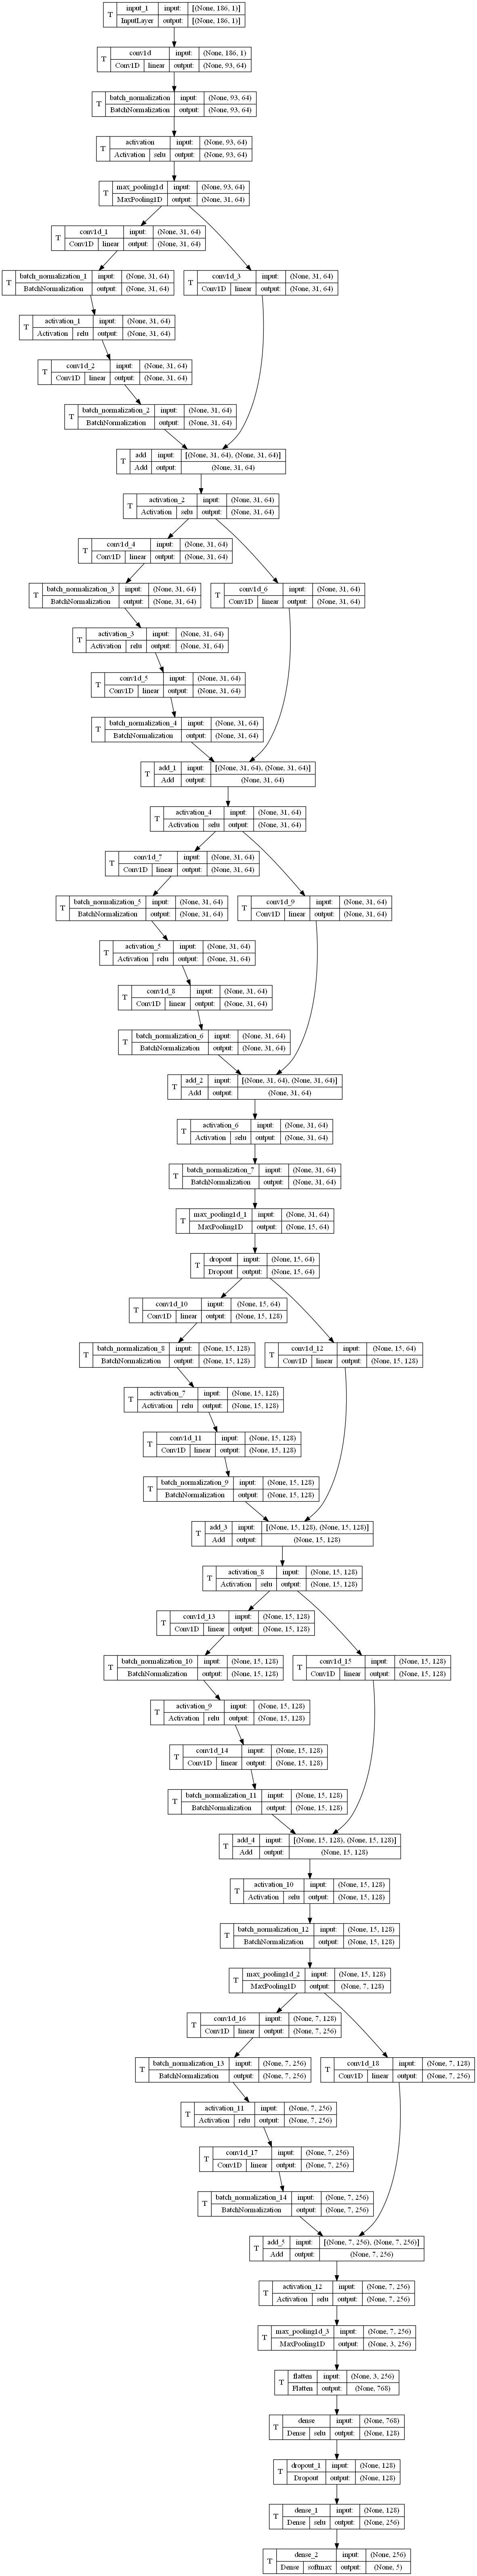

In [40]:
tf.keras.utils.plot_model(model,
                          to_file='modelv1a.png', 
                          show_layer_names=True,
                          show_layer_activations = True,
                          show_trainable = True,
                          show_shapes = True,
                          dpi=96)

In [41]:
callbacks = [
    EarlyStopping(monitor = "val_loss", patience = 10),
    ModelCheckpoint(filepath = "best_model.h5", monitor = "val_loss", save_best_only = True),
    TensorBoard(log_dir = "./tbb_logs")
            ]

In [42]:
x_train.shape

(87554, 186, 1)

In [43]:
y_test.shape

(21892, 5)

In [44]:
history = model.fit(
    x_train, y_train,
    epochs = 20,
    callbacks = callbacks,
    batch_size = 32,
    validation_data = (x_test, y_test)
)

Epoch 1/20


2737/2737 [==============================] - ETA: 0s - loss: 1.1626 - accuracy: 0.8003

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2737/2737 [==============================] - 151s 52ms/step - loss: 1.1626 - accuracy: 0.8003 - val_loss: 3.3202 - val_accuracy: 0.0254
Epoch 2/20
2737/2737 [==============================] - 153s 56ms/step - loss: 1.0954 - accuracy: 0.7984 - val_loss: 1.2097 - val_accuracy: 0.8276
Epoch 3/20
2737/2737 [==============================] - 143s 52ms/step - loss: 1.0566 - accuracy: 0.7999 - val_loss: 4.1204 - val_accuracy: 0.0661
Epoch 4/20
2737/2737 [==============================] - 143s 52ms/step - loss: 1.0874 - accuracy: 0.7966 - val_loss: 1.6499 - val_accuracy: 0.0074
Epoch 5/20
2737/2737 [==============================] - 134s 49ms/step - loss: 1.1020 - accuracy: 0.7957 - val_loss: 1.7444 - val_accuracy: 0.8276
Epoch 6/20
2737/2737 [==============================] - 134s 49ms/step - loss: 1.0958 - accuracy: 0.7950 - val_loss: 1.4386 - val_accuracy: 0.8276
Epoch 7/20
2737/2737 [==============================] - 137s 50ms/step - loss: 1.0735 - accuracy: 0.7950 - val_loss: 5.7837 - val

Model Performance Plots.

In [45]:
def model_plots(history):
    """ This function plots the model accuracy and loss. """
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    plt.legend(["Train", "Validation"], loc = "upper left")
    plt.show()


    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    plt.legend(["Train", "Validation"], loc = "upper left")
    plt.show()

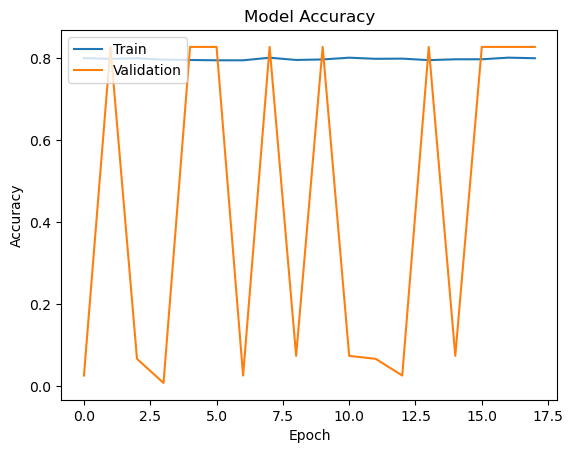

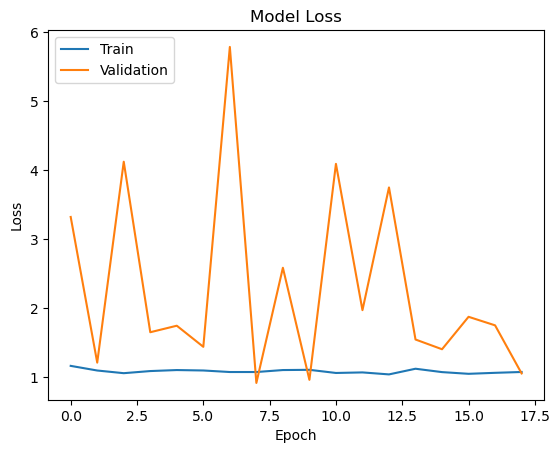

In [46]:
model_plots(history = history)

Model Evaluation

In [47]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy is: {accuracy} and Test Loss is: {loss}")

685/685 [==============================] - 12s 17ms/step - loss: 1.0530 - accuracy: 0.8276
Test Accuracy is: 0.8276082873344421 and Test Loss is: 1.0529624223709106


In [48]:
y_pred = model.predict(x_test)

685/685 [==============================] - 12s 15ms/step


Plot Confussion Matrix.

In [49]:
def plot_confusion_matrix(classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    y_pred_classes = np.argmax(y_pred, axis = 1)
    conf_matrix = confusion_matrix(y_test.argmax(axis = 1), y_pred.argmax(axis = 1))
    np.set_printoptions(precision = 2)
    
    if normalize:
        cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    
    
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
    print(classification_report(np.argmax(y_test, axis = 1), y_pred_classes, target_names = class_names))


In [50]:
class_names = ["N", "S", "V", "F", "Q"]

Normalized confusion matrix


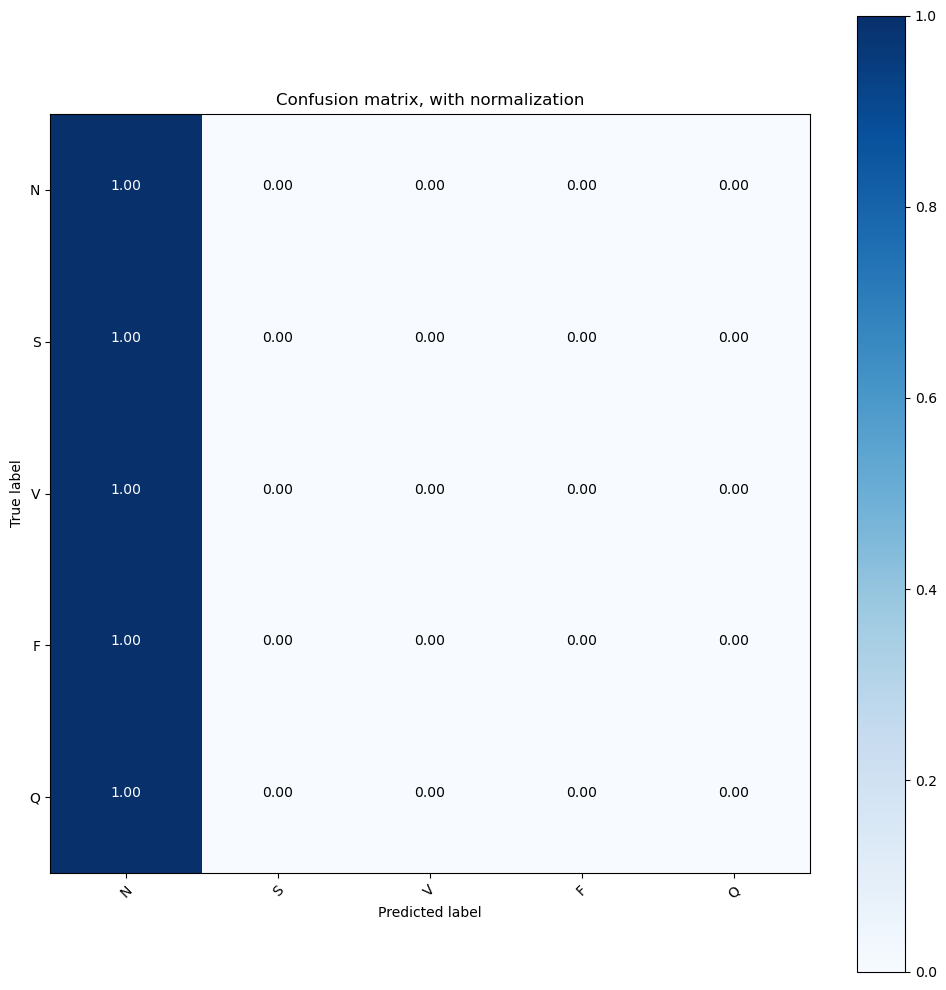

              precision    recall  f1-score   support

           N       0.83      1.00      0.91     18118
           S       0.00      0.00      0.00       556
           V       0.00      0.00      0.00      1448
           F       0.00      0.00      0.00       162
           Q       0.00      0.00      0.00      1608

    accuracy                           0.83     21892
   macro avg       0.17      0.20      0.18     21892
weighted avg       0.68      0.83      0.75     21892



c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
plot_confusion_matrix(classes = class_names, normalize = True,
                      title="Confusion matrix, with normalization")


Save the Model.

In [52]:
model_dir = "trained_models"

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
model.save(os.path.join(model_dir, "projectv01aModel.h5"))

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
# To load the model in future;

#loaded_model = tf.keras.models.load_model(os.path.join(model_dir, "projectv01aModel.h5"))